<a href="https://colab.research.google.com/github/pythagoras58/Quantizer/blob/main/retake_exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LOAD EXCEL DATA
library(readxl)
# Import data from an Excel file into R.
data_table <- read_excel("/content/drive/MyDrive/Colab Notebooks/data.xlsx")
View(data_table)



ID,Name,Surname,Age,Salary,Category,Rating,Group,Binary_Feature,Performance_Score,Geo_Latitude,Geo_Longitude,Data_With_Missing_Values
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Robert,Brown,62,113790,B,0.1233936,Y,1,4.731308,-61.353677,-50.761700,5
2,Linda,Rodriguez,18,82756,B,0.3362482,X,0,3.485501,19.028152,157.362135,2
3,Robert,Martin,21,144834,B,NA,X,0,5.326780,-69.180863,152.389911,3
4,David,Wilson,21,NA,C,2.2684842,Z,0,3.120389,41.019869,-78.178733,2
5,Thomas,Brown,57,101757,A,2.6828961,Y,0,6.112688,24.743210,-57.732824,3
6,Barbara,Jackson,27,104355,A,4.4833565,Z,1,2.075659,56.148941,36.076633,3
7,Charles,Wilson,37,119938,B,NA,Z,1,4.671491,-3.710781,166.751026,3
8,Sarah,Moore,39,199754,A,1.0844849,Y,1,6.313273,74.675356,-126.791520,5
9,James,Rodriguez,NA,86509,C,3.3153910,X,0,3.397598,-81.117190,-87.510008,3


In [ ]:
# Display data structure
str(data_table)

tibble [30 × 13] (S3: tbl_df/tbl/data.frame)
 $ ID                      : num [1:30] 1 2 3 4 5 6 7 8 9 10 ...
 $ Name                    : chr [1:30] "Robert" "Linda" "Robert" "David" ...
 $ Surname                 : chr [1:30] "Brown" "Rodriguez" "Martin" "Wilson" ...
 $ Age                     : num [1:30] 62 18 21 21 57 27 37 39 NA 41 ...
 $ Salary                  : num [1:30] 113790 82756 144834 NA 101757 ...
 $ Category                : chr [1:30] "B" "B" "B" "C" ...
 $ Rating                  : num [1:30] 0.123 0.336 NA 2.268 2.683 ...
 $ Group                   : chr [1:30] "Y" "X" "X" "Z" ...
 $ Binary_Feature          : num [1:30] 1 0 0 0 0 1 1 1 0 0 ...
 $ Performance_Score       : num [1:30] 4.73 3.49 5.33 3.12 6.11 ...
 $ Geo_Latitude            : num [1:30] -61.4 19 -69.2 41 24.7 ...
 $ Geo_Longitude           : num [1:30] -50.8 157.4 152.4 -78.2 -57.7 ...
 $ Data_With_Missing_Values: num [1:30] 5 2 3 2 3 3 3 5 3 2 ...


In [ ]:
# Determine the number of Missing Value
# Count the number of missing values in each column
missing_values <- colSums(is.na(data_table))

# Display the result
print(missing_values)

                      ID                     Name                  Surname 
                       0                        0                        0 
                     Age                   Salary                 Category 
                       5                        2                        0 
                  Rating                    Group           Binary_Feature 
                       5                        0                        0 
       Performance_Score             Geo_Latitude            Geo_Longitude 
                       0                        0                        0 
Data_With_Missing_Values 
                       3 



	Bartlett test of homogeneity of variances

data:  Performance_Score by Category
Bartlett's K-squared = 1.116, df = 2, p-value = 0.5723


            Df Sum Sq Mean Sq F value Pr(>F)
Category     2   3.69   1.846   0.397  0.676
Residuals   27 125.57   4.651               

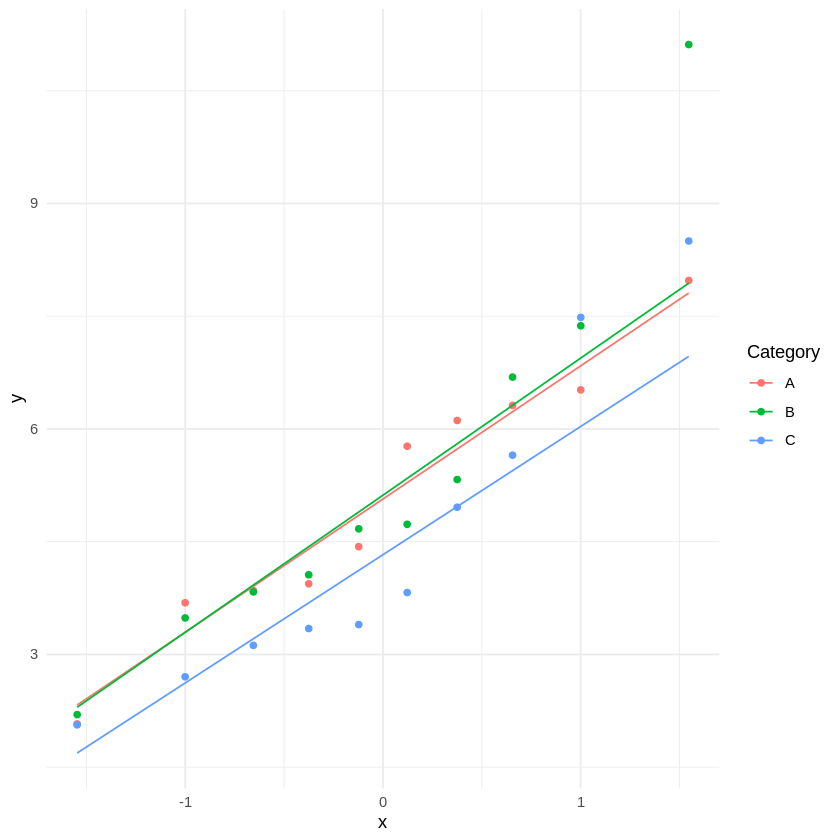

In [ ]:
# using ANOVA to analyze differences
# Step 1: Check assumptions (optional)
# Check normality (using a QQ plot)
library(ggplot2)

# Ensure the dataset is correctly referenced
ggplot(data = data_table, aes(sample = Performance_Score, color = Category)) +
  geom_qq() +
  geom_qq_line() +
  theme_minimal()

# Check homogeneity of variances (using Bartlett's test)
bartlett.test(Performance_Score ~ Category, data = data_table)

# Step 2: Perform ANOVA
anova_result <- aov(Performance_Score ~ Category, data = data_table)

# Step 3: Display the ANOVA table
summary(anova_result)

# **Bubble Chart**

Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”


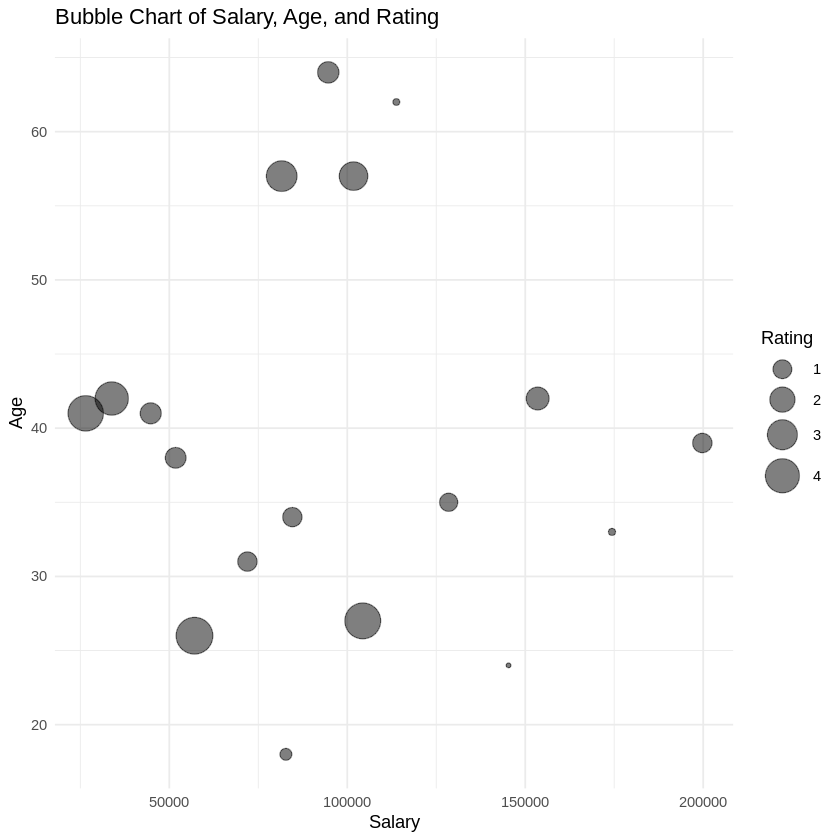

In [ ]:
library(ggplot2)

# Create the bubble chart
ggplot(data = data_table, aes(x = Salary, y = Age, size = Rating)) +
  geom_point(alpha = 0.5) +   # Add points with transparency
  scale_size_continuous(range = c(1, 10)) +  # Adjust the size range for bubbles
  labs(title = "Bubble Chart of Salary, Age, and Rating",
       x = "Salary",
       y = "Age",
       size = "Rating") +
  theme_minimal()

In [ ]:
data_table

ID,Name,Surname,Age,Salary,Category,Rating,Group,Binary_Feature,Performance_Score,Geo_Latitude,Geo_Longitude,Data_With_Missing_Values
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Robert,Brown,62,113790,B,0.1233936,Y,1,4.731308,-61.353677,-50.761700,5
2,Linda,Rodriguez,18,82756,B,0.3362482,X,0,3.485501,19.028152,157.362135,2
3,Robert,Martin,21,144834,B,NA,X,0,5.326780,-69.180863,152.389911,3
4,David,Wilson,21,NA,C,2.2684842,Z,0,3.120389,41.019869,-78.178733,2
5,Thomas,Brown,57,101757,A,2.6828961,Y,0,6.112688,24.743210,-57.732824,3
6,Barbara,Jackson,27,104355,A,4.4833565,Z,1,2.075659,56.148941,36.076633,3
7,Charles,Wilson,37,119938,B,NA,Z,1,4.671491,-3.710781,166.751026,3
8,Sarah,Moore,39,199754,A,1.0844849,Y,1,6.313273,74.675356,-126.791520,5
9,James,Rodriguez,NA,86509,C,3.3153910,X,0,3.397598,-81.117190,-87.510008,3


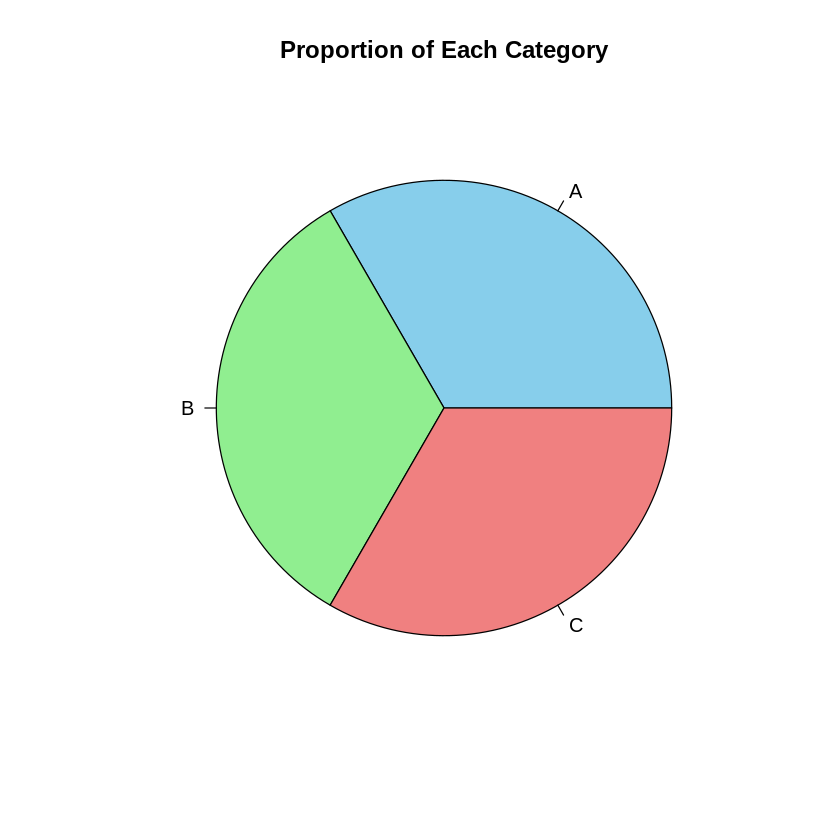

In [ ]:
# Count the occurrences of each category
category_counts <- table(data_table$Category)

# Create the pie chart
pie(category_counts, labels = names(category_counts),
    col = c("skyblue", "lightgreen", "lightcoral"),
    main = "Proportion of Each Category")

In [ ]:
# Install and load the fmsb package
install.packages("fmsb")
library(fmsb)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



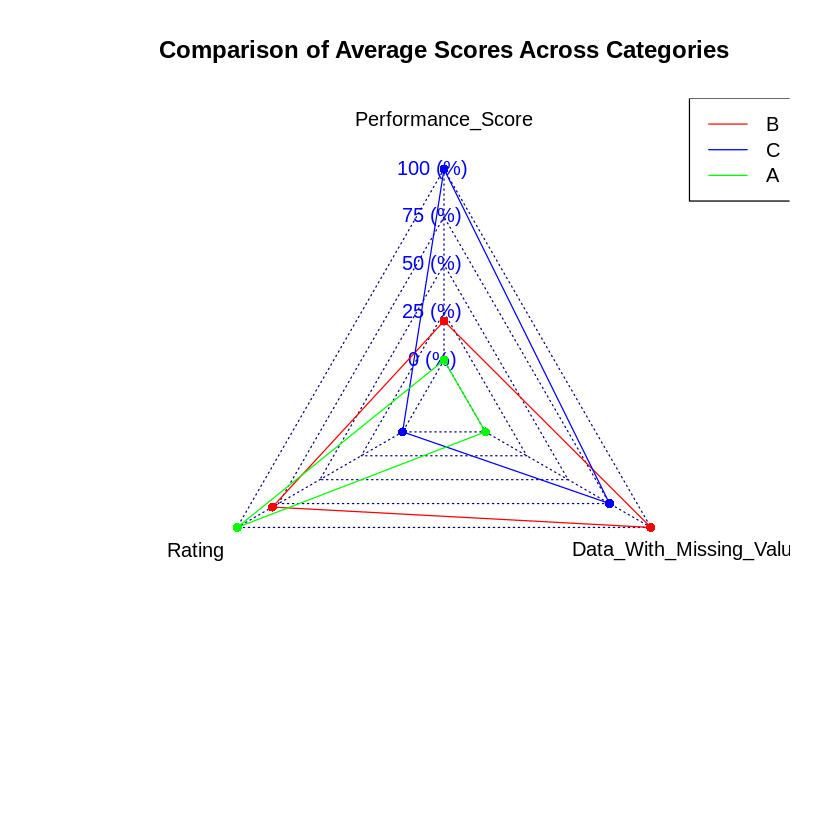

In [ ]:
# Calculate the average scores for each category
average_scores <- aggregate(cbind(Performance_Score, Rating, Data_With_Missing_Values) ~ Category, data_table, mean)

# Prepare the data for radar chart
# Add rows for max and min values (required for fmsb radar chart)
max_min <- data.frame(
  Performance_Score = c(max(average_scores$Performance_Score), min(average_scores$Performance_Score)),
  Rating = c(max(average_scores$Rating, na.rm = TRUE), min(average_scores$Rating, na.rm = TRUE)),
  Data_With_Missing_Values = c(max(average_scores$Data_With_Missing_Values, na.rm = TRUE), min(average_scores$Data_With_Missing_Values, na.rm = TRUE))
)

# Bind the max_min with average_scores and ensure correct row names
average_scores <- rbind(max_min, average_scores[,-1])

# Set row names correctly (Max, Min, and Categories)
rownames(average_scores) <- c("Max", "Min", as.character(unique(data_table$Category)))

# Plot the radar chart
radarchart(average_scores, axistype = 1,
           pcol = c("red", "blue", "green"),
           plty = 1,
           title = "Comparison of Average Scores Across Categories",
           vlabels = colnames(average_scores))
legend("topright", legend = rownames(average_scores)[-c(1, 2)], col = c("red", "blue", "green"), lty = 1)